# Import

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('SAheart.csv')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [29]:
df.chd.value_counts()

chd
0    302
1    160
Name: count, dtype: int64

# Correlation Matrix

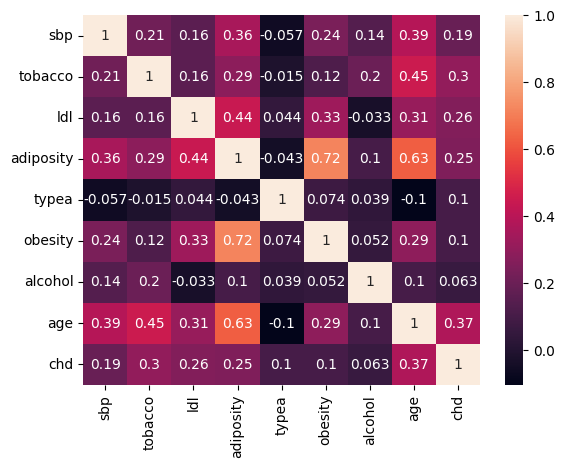

In [7]:
columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea','obesity', 'alcohol', 'age', 'chd']

coor_matrix = df[columns].corr()
sn.heatmap(coor_matrix, annot=True)
plt.show()

# Data split and Model Training

In [20]:
feature_data = df[columns[:-1]].values
labels = df['chd'].values

X_train, X_test, Y_train, Y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=2021)

In [61]:
trained_lr_model = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

/Users/dongyanshen/miniconda3/envs/pace_ai_0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation

In [62]:
def evaluate(model, X, Y):
    # predictions of label classes for the seen train data
    predicted_Y_train = model.predict(X)
    label_class_set = model.classes_

    # calculate accuracy score
    accuracy = metrics.accuracy_score(Y, predicted_Y_train)
    print(f'Accuracy: {accuracy:.3f}')

    # calculate precision score
    precision = metrics.precision_score(Y, predicted_Y_train)
    print(f'Precision: {precision:.3f}')

    # calculate recall score
    recall = metrics.recall_score(Y, predicted_Y_train)
    print(f'Recall: {recall:.3f}')

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # calculate and plot confusion matrix
    cm = metrics.confusion_matrix(Y, predicted_Y_train, labels=label_class_set)
    disp = metrics.ConfusionMatrixDisplay(cm, display_labels=label_class_set)
    disp.plot(ax=axs[0])
    axs[0].set_title('Confusion Matrix')

    # calculate and plot ROC AUC curve
    FPR, TPR, _ = metrics.roc_curve(Y, predicted_Y_train)
    roc_auc = metrics.auc(FPR, TPR)
    disp = metrics.RocCurveDisplay(fpr=FPR, tpr=TPR, roc_auc=roc_auc)
    disp.plot(ax=axs[1])
    axs[1].set_title('ROC AUC Curve')

    

## on Training Set

Accuracy: 0.702
Precision: 0.561
Recall: 0.740


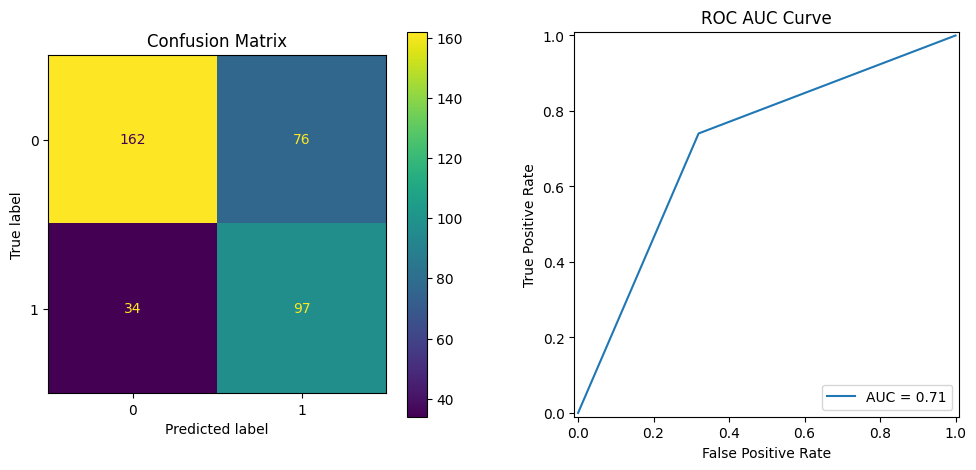

In [63]:
evaluate(trained_lr_model, X_train, Y_train)

## on Testing Set

Accuracy: 0.634
Precision: 0.444
Recall: 0.690


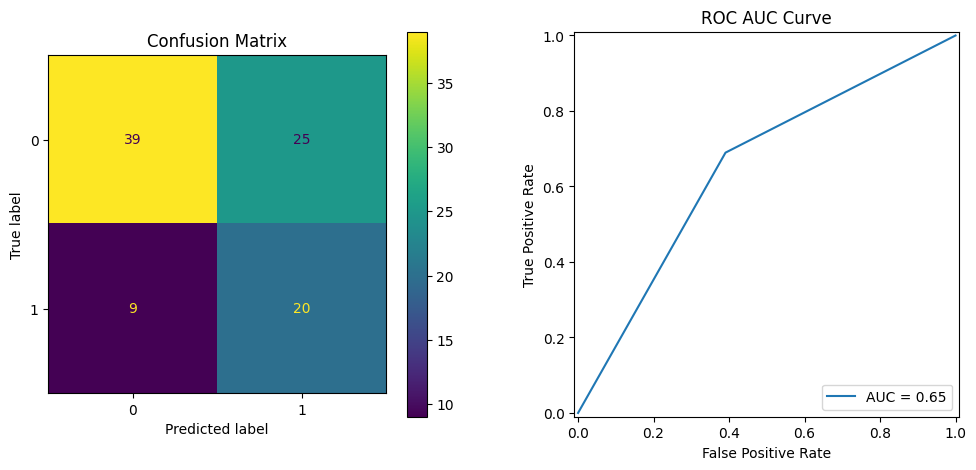

In [64]:
evaluate(trained_lr_model, X_test, Y_test)